In [17]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats as stats
import pylab
from random import uniform
from matplotlib.pyplot import figure

In [18]:
#Import the data set
df = pd.read_csv("HY_Universe_corporate bond.csv")

In [19]:
#Get an idea of the size and shape of the data set.
print(df.shape)

(2721, 37)


In [20]:
#Get number of numeric attributes in df
num_cols = df._get_numeric_data().columns

#Drop row with more than 20% of data missing
df.replace(["Nan","WR","NR","WD"],np.nan,inplace=True)
df = df.dropna(thresh=30)
# New number of row after clean up
print(df.shape[0])
df.head()

2178


,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,NaN,NaN,NaN,NaN,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,NaN,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,NaN,NaN,NaN,BB+,NaN,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,NaN,NaN,NaN,NaN,NaN,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [21]:
#Find col index of categorical data
cate_col_index = np.zeros(shape=(1,df.shape[1]-len(num_cols)))
count = 0
for i in range(0,df.shape[1]):
    if isinstance(df.iat[23,i],str):
        cate_col_index[0,count] = i
        count += 1
        
print(cate_col_index)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8. 11. 12. 14. 16. 17. 18. 19.]]


In [22]:
# Count of the unique categories in each categorical attribute.
# Summary statistic for the numerical attributes.
df.describe(include='all')

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,2178,2178,2178,2178,964,1512,1526,951,1544,2178.000000,...,2178.000000,2178.000000,2178.000000,2178.000000,2.178000e+03,2.178000e+03,2.178000e+03,2.178000e+03,2178.000000,2178.000000
unique,2178,726,1271,832,330,42,39,36,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,25278XAF6,CHTR,6/6/2017,Nan Field Not Applicable,10/23/2017,Ba1,BB+,BBB-,BB+,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,31,9,77,235,216,214,190,258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.810427,...,0.246775,0.680818,3.144628,0.374637,8.557208e+06,6.383911e+06,5.702086e+07,6.638135e+05,23.769425,2.509642
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.381698,...,0.142607,0.200240,1.736876,0.134579,9.338361e+06,7.567639e+06,7.159504e+07,3.069308e+06,33.479633,4.803072
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.500000e+04,7.325000e+03,1.500000e+04,1.400000e+01,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.027500,...,0.139392,0.546606,1.000000,0.290475,2.937496e+06,2.000000e+06,1.320000e+07,2.500000e+04,5.507716,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.250000,...,0.255538,0.677525,3.000000,0.371768,5.940005e+06,4.223250e+06,3.069150e+07,1.302500e+05,12.783106,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.630000,...,0.351910,0.844406,5.000000,0.438328,1.075618e+07,8.049500e+06,7.627100e+07,4.500000e+05,27.476757,2.000000


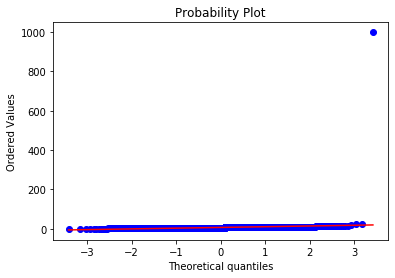

((array([-3.41560815, -3.16614522, -3.02786801, ...,  3.02786801,
          3.16614522,  3.41560815]),
  array([ 0.  ,  0.  ,  0.  , ..., 17.5 , 22.48, 25.04])),
 (2.1534456841615786, 6.351749311294766, 0.9830427287022974))

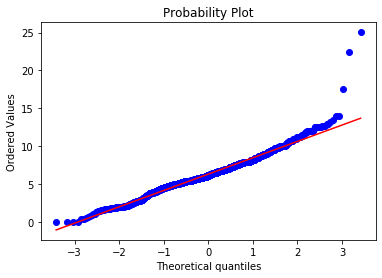

In [23]:
#Visualize outliers using Quantile-Quantile plot for coupon
coup = (df.loc[:,['Coupon']])
coup = np.array(coup)

# This is only to remove the large outlier of Coupon.(900)
coup_temp = np.zeros(shape=(1,2178))
x = 0
for i in range(0,len(coup)):
    if coup[i] > 800:
        x = i
    else:
        coup_temp[0,i] =  coup[i]

# Plot with the very large outlier
stats.probplot(np.sort(coup,axis=None),dist="norm",plot=pylab)
plot.show()
# Plot without the very large outlier
stats.probplot(np.sort(coup_temp,axis=None),dist="norm",plot=pylab)


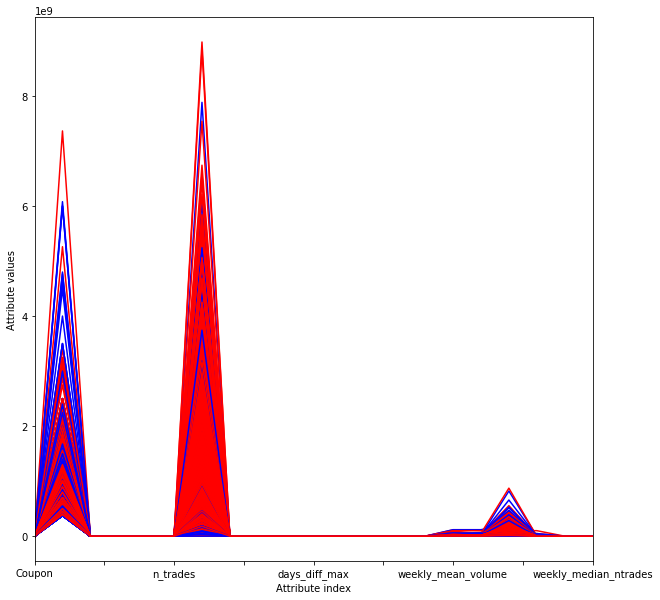

In [24]:
num_col_index = np.array([9,10,13,15,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plot.figure(figsize=(10,10))
for i in range(0,2178):
    if df.iat[i,19] == "Yes":
        pcolor = "red"
    else:
        pcolor = "blue"
    
    dataRow = df.iloc[i,num_col_index]
    dataRow.plot(color=pcolor)
plot.xlabel("Attribute index")
plot.ylabel("Attribute values")
plot.show()

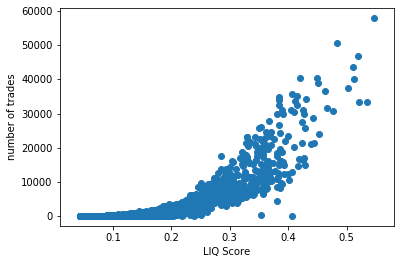

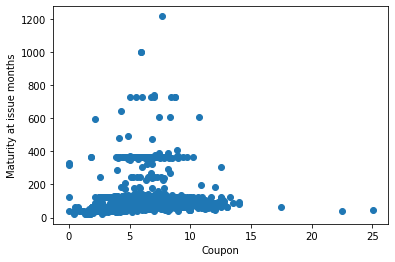

In [25]:
# Scatter plot of LIQ Score V.S. number of trades
# We can see a certain correlation between the two attributes
attribute_1 = df.iloc[:,20]
attribute_2 = df.iloc[:,21]
plot.scatter(attribute_1,attribute_2)
plot.xlabel("LIQ Score")
plot.ylabel("number of trades")
plot.show()

# Scatter plot of Coupon V.S. Maturity at issue months
# Use of Coupon attribute with very large outlier removed.
# We cannot see a certain correlation between the two attributes
attribute_1 = coup_temp
attribute_2 = df.iloc[:,13]
plot.scatter(attribute_1,attribute_2)
plot.xlabel("Coupon")
plot.ylabel("Maturity at issue months")
plot.show()

Text(0, 0.5, 'Target Value(In ETF)')

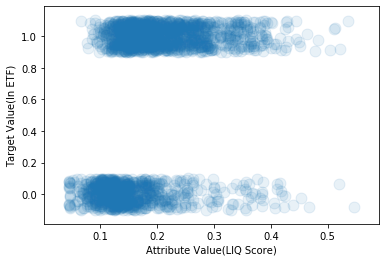

In [26]:
target = []
for i in range(0,2178):
    if df.iat[i,19] == 'Yes':
        target.append(1.0 + uniform(-0.1,0.1))
    else:
        target.append(0.0 + uniform(-0.1,0.1))
data_row = df.iloc[:,20]
#data_row = coup_temp
plot.scatter(data_row,target,alpha=0.1,s=120)
plot.xlabel('Attribute Value(LIQ Score)')
plot.ylabel('Target Value(In ETF)')

In [27]:
# We check the correlation between the attributes that we used for the scatter plots.
# The correlation scores confirm our assumptions from the scatter plot.
print("Correlation between Liquidity score and number of trades: " + str(df['LIQ SCORE'].corr(df['n_trades'])))
print("Correlation between Coupon score and Maturity at issue month: " + str(df['Coupon'].corr(df['Maturity At Issue months'])))

Correlation between Liquidity score and number of trades: 0.8219527467157978
Correlation between Coupon score and Maturity at issue month: 0.007268459971472698


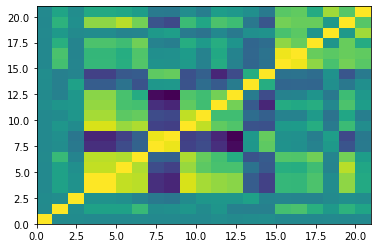

In [28]:
# Correlation using a heat map
corMat = pd.DataFrame(df.corr())
plot.pcolor(corMat)
plot.show()

In [29]:
print("My name is Timothee Becker")
print("My NetID is: tbecker5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Timothee Becker
My NetID is: tbecker5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
